In [ ]:
# ..... find markers for each cluster? ..... #

In [2]:
library(Seurat)
library(dplyr)

In [3]:
papers = c('Asp', 'Feng', 'Hill', 'Knight-Schrijver', 'Mantri', 'Qiu', 
           'Farah', 'Kanemaru', 'Xu', 'Cui')

cols1 = c('predicted', 'predicted', 'predicted', 'class', 'predicted', 'class',
          'predicted', 'class', 'predicted', 'predicted')

In [4]:
# get list of samples
stages = rep(c('stage9', 'stage13', 'stage16'), each = 3)
samples = paste0('sample', rep(1:3, 3))

In [5]:
# load data
id = 1
file0 = paste0(stages[id], '_', samples[id], '_data.rds')
paste0(stages[id], '_', samples[id])

sce = readRDS(file0)
sce

[1] "stage9_sample1"

An object of class Seurat 
22732 features across 10437 samples within 1 assay 
Active assay: RNA (22732 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

In [6]:
files0 = list.files('annotations/')
files1 = files0[grep(paste0(stages[id], '_', samples[id]), files0)]
files1

[1] "stage9_sample1_Asp_celltypes.csv"               
 [2] "stage9_sample1_Cui_celltypes.csv"               
 [3] "stage9_sample1_Farah_celltypes.csv"             
 [4] "stage9_sample1_Feng_celltypes.csv"              
 [5] "stage9_sample1_Hill_celltypes.csv"              
 [6] "stage9_sample1_Kanemaru_celltypes.csv"          
 [7] "stage9_sample1_Knight-Schrijver_celltypes.csv"  
 [8] "stage9_sample1_Mantri_celltypes.csv"            
 [9] "stage9_sample1_Mantri_Seurat_label_transfer.csv"
[10] "stage9_sample1_Qiu_celltypes.csv"               
[11] "stage9_sample1_Xu_celltypes.csv"

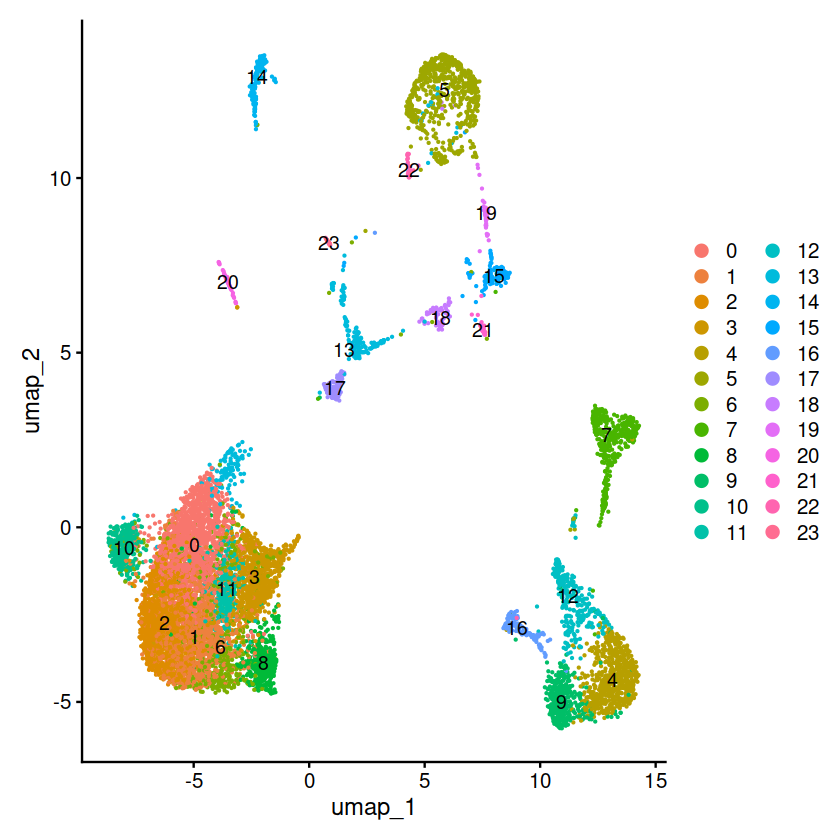

In [7]:
DimPlot(sce, reduction = 'umap', label = T)

In [12]:
sum(sce$seurat_clusters %in% c(0:3,6,8,10,11))

[1] 6828

In [8]:
Idents(sce) <- "seurat_clusters"

In [26]:
# top markers
markers <- FindMarkers(object = sce, ident.1 = 4, only.pos = T)
head(markers)

p_val avg_log2FC pct.1 pct.2 p_val_adj
NTNG1        0     4.085128   0.970 0.114 0        
LOC132778998 0     3.779824   0.982 0.127 0        
PRDM16       0     3.395885   0.972 0.134 0        
ANGPT1       0     3.416573   0.949 0.111 0        
LDB3         0     3.384575   0.984 0.148 0        
CHRM2        0     3.676733   0.997 0.163 0

In [27]:
rownames(markers)[1:50]

[1] "NTNG1"        "LOC132778998" "PRDM16"       "ANGPT1"       "LDB3"        
 [6] "CHRM2"        "LRRTM3"       "MYH7B"        "FGF14"        "SDK2"        
[11] "PPARGC1A"     "PLEKHA7"      "RYR2"         "RBM20"        "FGF13"       
[16] "ALPK3"        "VCAN"         "ERBB4"        "TRDN"         "PALLD"       
[21] "PDE1C"        "LOC132767889" "MYOM1"        "SORBS2"       "SORBS1"      
[26] "MYBPC3"       "NEBL"         "ACTN2"        "LOC132774046" "VEGFA"       
[31] "DMD"          "NHS"          "ABLIM1"       "CEP85L"       "LOC132778072"
[36] "MICAL3"       "CACNA2D1"     "ESRRG"        "ABLIM3"       "FHOD3"       
[41] "SLC8A1"       "RBPMS2"       "PLN"          "LOC132778465" "FILIP1L"     
[46] "FAT3"         "LOC132774562" "GALNT18"      "DACH1"        "PTPRF"

In [29]:
which(rownames(markers)=='TTN')

integer(0)

In [495]:
# MYH7 in atria, IRX4 in ventricles, ACTC1 and GJA5 in both - Mantri et al
paste0('MYH7   ', which(rownames(markers)=='MYH7'))
paste0('IRX4   ', which(rownames(markers)=='IRX4'))

[1] "MYH7   "

[1] "IRX4   "

In [496]:
which(rownames(markers)=='DCN')
which(rownames(markers)=='MYH11')
# which(rownames(markers)=='CDH5')

[1] 166

integer(0)

In [11]:
# get df of classifications and annos
df = c()

for(ii in 1:length(papers)){
    temp = read.delim(paste0('annotations/', stages[id], '_', samples[id], '_', papers[ii], '_celltypes.csv'), sep = ',')
    temp$study = papers[ii]
    temp$cluster = sce$seurat_clusters
    temp$anno = temp[,match(cols1[ii], colnames(temp))]
    df = rbind(df, temp[,c('study', 'cluster', 'anno')])
}

df$ctype = paste0(df$study, '_', df$anno)
head(df)

study cluster anno                          
stage9_sample1_AAACCCAAGACCATGG-1 Asp   5       Endothelium Pericytes Adventia
stage9_sample1_AAACCCAAGTAACGAT-1 Asp   1       Erythrocytes                  
stage9_sample1_AAACCCAAGTGATAGT-1 Asp   3       Erythrocytes                  
stage9_sample1_AAACCCACAAACACCT-1 Asp   0       Erythrocytes                  
stage9_sample1_AAACCCACAAGACCTT-1 Asp   6       Erythrocytes                  
stage9_sample1_AAACCCAGTCTTGCGG-1 Asp   17      Myoz2 CM                      
                                  ctype                             
stage9_sample1_AAACCCAAGACCATGG-1 Asp_Endothelium Pericytes Adventia
stage9_sample1_AAACCCAAGTAACGAT-1 Asp_Erythrocytes                  
stage9_sample1_AAACCCAAGTGATAGT-1 Asp_Erythrocytes                  
stage9_sample1_AAACCCACAAACACCT-1 Asp_Erythrocytes                  
stage9_sample1_AAACCCACAAGACCTT-1 Asp_Erythrocytes                  
stage9_sample1_AAACCCAGTCTTGCGG-1 Asp_Myoz2 CM

In [13]:
table(sce$seurat_clusters)


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
1562 1424 1406  825  671  667  484  438  424  407  362  341  310  293  160  148 
  16   17   18   19   20   21   22   23 
 136  114   77   52   48   39   29   20 

In [25]:
df %>% filter(cluster == 4) %>%
group_by(ctype) %>% reframe(count = n()) %>% arrange(-count) 

ctype                                        count
1  Cui_C2 (CM)                                  671  
2  Qiu_Cardiomyocytes                           671  
3  Knight-Schrijver_Cardiomyocytes              667  
4  Mantri_MT-enriched cardiomyocytes            661  
5  Xu_atrioventricular canal                    643  
6  Hill_CM                                      558  
7  Kanemaru_regular ventricular cardiac myocyte 449  
8  Feng_atrial_cm                               425  
9  Asp_aCM                                      399  
10 Farah_vCM                                    343  
11 Farah_aCM                                    328  
12 Asp_vCM                                      272  
13 Feng_ventricular_cm                          246  
14 Kanemaru_regular atrial cardiac myocyte      222  
15 Hill_CM-AVC                                   61  
16 Hill_CM-LSV                                   42  
17 Xu_atria cardiomyocyte-2                      27  
18 Hill_CM-Atrial                                 7  
19 Mantri_Fibroblast cells                        6  
20 Hill_CM-LV                                     3  
21 Knight-Schrijver_Endothelial_Other             3  
22 Mantri_Cardiomyocytes-1                        3  
23 Knight-Schrijver_Immature_Cardiomyocytes       1  
24 Mantri_Erythrocytes                            1  
25 Xu_cardiomyocyte-1                             1

In [41]:
ids = which(sce$seurat_clusters==1)
table(temp$predicted[ids])


          Cardiomyocytes-2          Endocardial cells 
                        85                        732 
      Epi-epithelial cells      Epi-mesenchymal cells 
                         2                          1 
          Fibroblast cells                Mural cells 
                       203                        135 
               Valve cells Vascular endothelial cells 
                         2                         26 